In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv("startup-data.csv", index_col=0)
df.head()

,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
# data exploration
df.describe(include='all')

,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923,923.000000,923.000000,923,923,923,430,923,923.000000,923,...,923,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923
unique,35,NaN,NaN,382,922,221,252,922,NaN,217,...,922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,CA,NaN,NaN,94107,c:28482,San Francisco,San Francisco CA 94105,Redwood Systems,NaN,1/1/2003,...,c:28482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acquired
freq,488,NaN,NaN,30,2,128,12,2,NaN,55,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597
mean,NaN,38.517442,-103.539212,NaN,NaN,NaN,NaN,NaN,0.646804,NaN,...,NaN,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,NaN
std,NaN,3.741497,22.394167,NaN,NaN,NaN,NaN,NaN,0.478222,NaN,...,NaN,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,NaN
min,NaN,25.752358,-122.756956,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,NaN,37.388869,-122.198732,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,NaN
50%,NaN,37.779281,-118.374037,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,NaN
75%,NaN,40.730646,-77.214731,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,NaN


In [4]:
#data cleaning

In [5]:
# module 3 - simple probability

# success given angel investors vs vc
nAll = len(df)

nSuccess = sum(df['status'] == "acquired")
isSuccess = df[df['status'] == "acquired"]

nAngel = sum(df['has_angel'] == 1)
hasAngel = df[df['has_angel'] == 1]

nVC = sum(df['has_VC'] == 1)
hasVC = df[df['has_VC'] == 1]

prob_a = nSuccess/nAll
prob_b = nAngel/nAll
prob_c = nVC/nAll

prob_a_given_b_data = sum(hasAngel['status'] == "acquired")/nAngel
prob_b_given_a_data = sum(isSuccess['has_angel'] == 1)/nSuccess
prob_a_given_b_bayes = (prob_b_given_a_data*prob_a)/prob_b
prob_b_given_a_bayes = (prob_a_given_b_data*prob_b)/prob_a
print("Success given angel:", prob_a_given_b_bayes)
print("Angel given success:", prob_b_given_a_bayes)

prob_a_given_c_data = sum(hasVC['status'] == "acquired")/nVC
prob_c_given_a_data = sum(isSuccess['has_VC'] == 1)/nSuccess
prob_a_given_c_bayes = (prob_c_given_a_data*prob_a)/prob_c
prob_c_given_a_bayes = (prob_a_given_c_data*prob_c)/prob_a
print("Success given VC:", prob_a_given_c_bayes)
print("VC given success:", prob_c_given_a_bayes)

# average milestones for funding over medians vs under medians
ms_highfund = 'Milestone - High Funding'
ms_lowfund = 'Milestone - Low Funding'
fund_avg = np.mean(df['funding_total_usd'])
df[ms_highfund] = (df['funding_total_usd'] > fund_avg) 
df[ms_lowfund] = (df['funding_total_usd'] <= fund_avg) 
ms_low_analysis = np.mean(df[df[ms_highfund]]['milestones'])
ms_high_analysis = np.mean(df[df[ms_lowfund]]['milestones'])

print("Average funding:", fund_avg)
print("Milestones with low funding:", ms_low_analysis)
print("Milestones with high funding:", ms_high_analysis)

Success given angel: 0.5872340425531916
Angel given success: 0.23115577889447234
Success given VC: 0.6079734219269103
VC given success: 0.30653266331658297
Average funding: 25419749.09209101
Milestones with low funding: 2.0
Milestones with high funding: 1.7929078014184396


In [10]:
# module 5 - confidence intervals

# funding in different areas
df_ny = df[df['state_code']=='NY']
n1 = df_ny.shape[0]
interval1 = stats.norm.interval(
    0.95, df_ny['funding_total_usd'].mean(),
    df_ny['funding_total_usd'].std()/np.sqrt(n1))

df_ca = df[df['state_code']=='CA']
n2 = df_ca.shape[0]
interval2 = stats.norm.interval(
    0.95, df_ca['funding_total_usd'].mean(),
    df_ca['funding_total_usd'].std()/np.sqrt(n2))

df_ma = df[df['state_code']=='MA']
n3 = df_ma.shape[0]
interval3 = stats.norm.interval(
    0.95, df_ma['funding_total_usd'].mean(),
    df_ma['funding_total_usd'].std()/np.sqrt(n3))

print(f"N1: {n1}, N2: {n2}, N3: {n3}")
print('Funding in NY:', interval1)
print('Funding in CA:', interval2)
print('Funding in MA:', interval3)

N1: 106, N2: 488, N3: 83
Funding in NY: (8792587.862359444, 16276237.307451876)
Funding in CA: (18144610.940789524, 22866886.546915393)
Funding in MA: (17040942.816018447, 26964166.485186376)


In [33]:
# MODULE 8 - VISUALIZATIONS

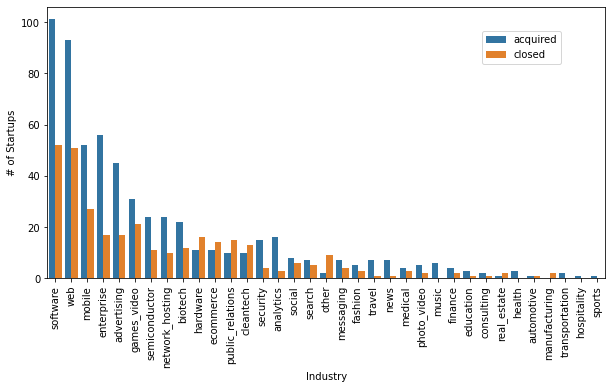

In [51]:
# success by industry
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="category_code", hue="status", data=df,
              order=df.category_code.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Industry", ylabel="# of Startups")
plt.legend(bbox_to_anchor=(0.93, 0.93))

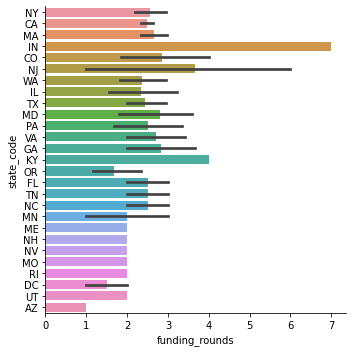

In [52]:
# funding rounds in diff locations
rounds_df = success_mask.sort_values(by=["funding_rounds"], ascending=False)
sns.catplot(data=rounds_df, y="state_code", x="funding_rounds", kind="bar")

In [53]:
# startups acquired by location
#trending_statea = df.groupby(['state_code']).size().rename('num_startup').reset_index()
# most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
# most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)

success_mask = df[df["status"] == "acquired"]
loc_industry_success = success_mask.groupby(['state_code','category_code']).size().rename('total_startups').reset_index()
loc_industry_success = loc_industry_success[loc_industry_success.groupby('state_code')['total_startups'].transform(max) == loc_industry_success['total_startups']]
loc_industry_success = loc_industry_success.sort_values('total_startups', ascending=False)
loc_industry_success.head(10)

,state_code,category_code,total_startups
31,CA,web,55
72,MA,software,16
111,NY,web,15
144,WA,mobile,5
128,TX,enterprise,4
136,TX,web,4
51,IL,software,4
37,CO,software,4
44,GA,enterprise,2
138,VA,mobile,2


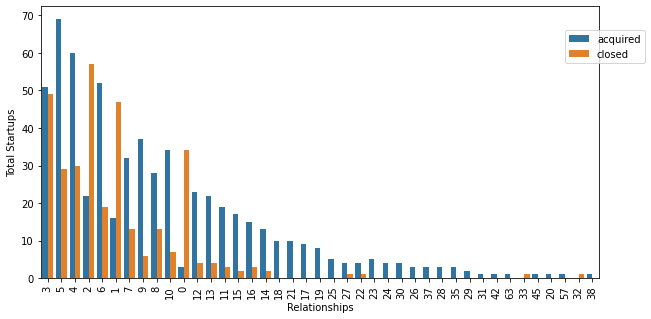

In [55]:
# relationships with success
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="relationships", hue="status", data=df, 
              order=df.relationships.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Relationships", ylabel="Total Startups")
plt.legend(bbox_to_anchor=(0.93, 0.93))

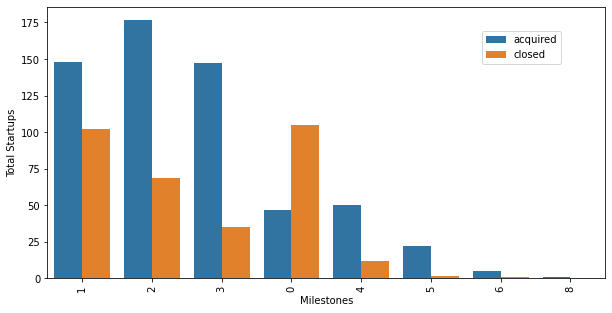

In [60]:
# milestones with success
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="milestones", hue="status", data=df, 
              order=df.milestones.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Milestones", ylabel="Total Startups")
plt.legend(bbox_to_anchor=(0.93, 0.93))

In [ ]:
# machine learning - to do in future